In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading datasets
data=pd.read_csv('./dataset/housing.csv')


In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data['total_bedrooms'].mean()

537.8705525375618

In [8]:
data['total_bedrooms']=data['total_bedrooms'].interpolate(method='linear')

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

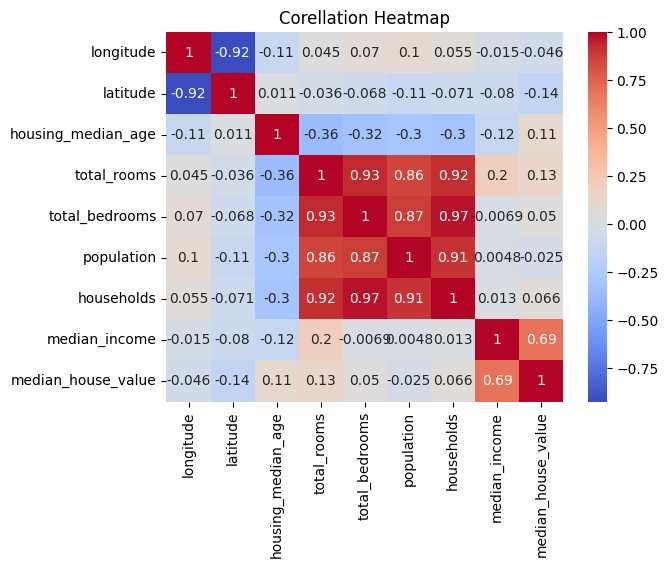

In [10]:
data_dropped=data.drop(['ocean_proximity'],axis=1)
sns.heatmap(data_dropped.corr(),annot=True,cmap='coolwarm')
plt.title('Corellation Heatmap')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
train_data=x_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16477,-121.26,38.13,25.0,2549.0,675.0,2053.0,648.0,2.0875,INLAND,83100.0
15589,-116.67,32.97,16.0,349.0,74.0,120.0,43.0,5.3590,<1H OCEAN,193800.0
8816,-118.32,33.75,37.0,1080.0,135.0,366.0,142.0,11.6677,NEAR OCEAN,500001.0
18405,-121.86,37.25,16.0,6958.0,1300.0,2965.0,1217.0,4.2885,<1H OCEAN,262400.0
11182,-117.94,33.82,34.0,1347.0,212.0,676.0,201.0,3.8828,<1H OCEAN,215400.0
...,...,...,...,...,...,...,...,...,...,...
13737,-117.21,34.04,14.0,3063.0,426.0,1570.0,419.0,6.2917,INLAND,224700.0
17562,-121.89,37.32,41.0,977.0,265.0,865.0,253.0,3.2317,<1H OCEAN,184800.0
16316,-121.32,38.00,21.0,1795.0,482.0,1114.0,472.0,2.0091,INLAND,101500.0
9985,-122.57,38.58,18.0,2083.0,506.0,926.0,487.0,1.9925,INLAND,225000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

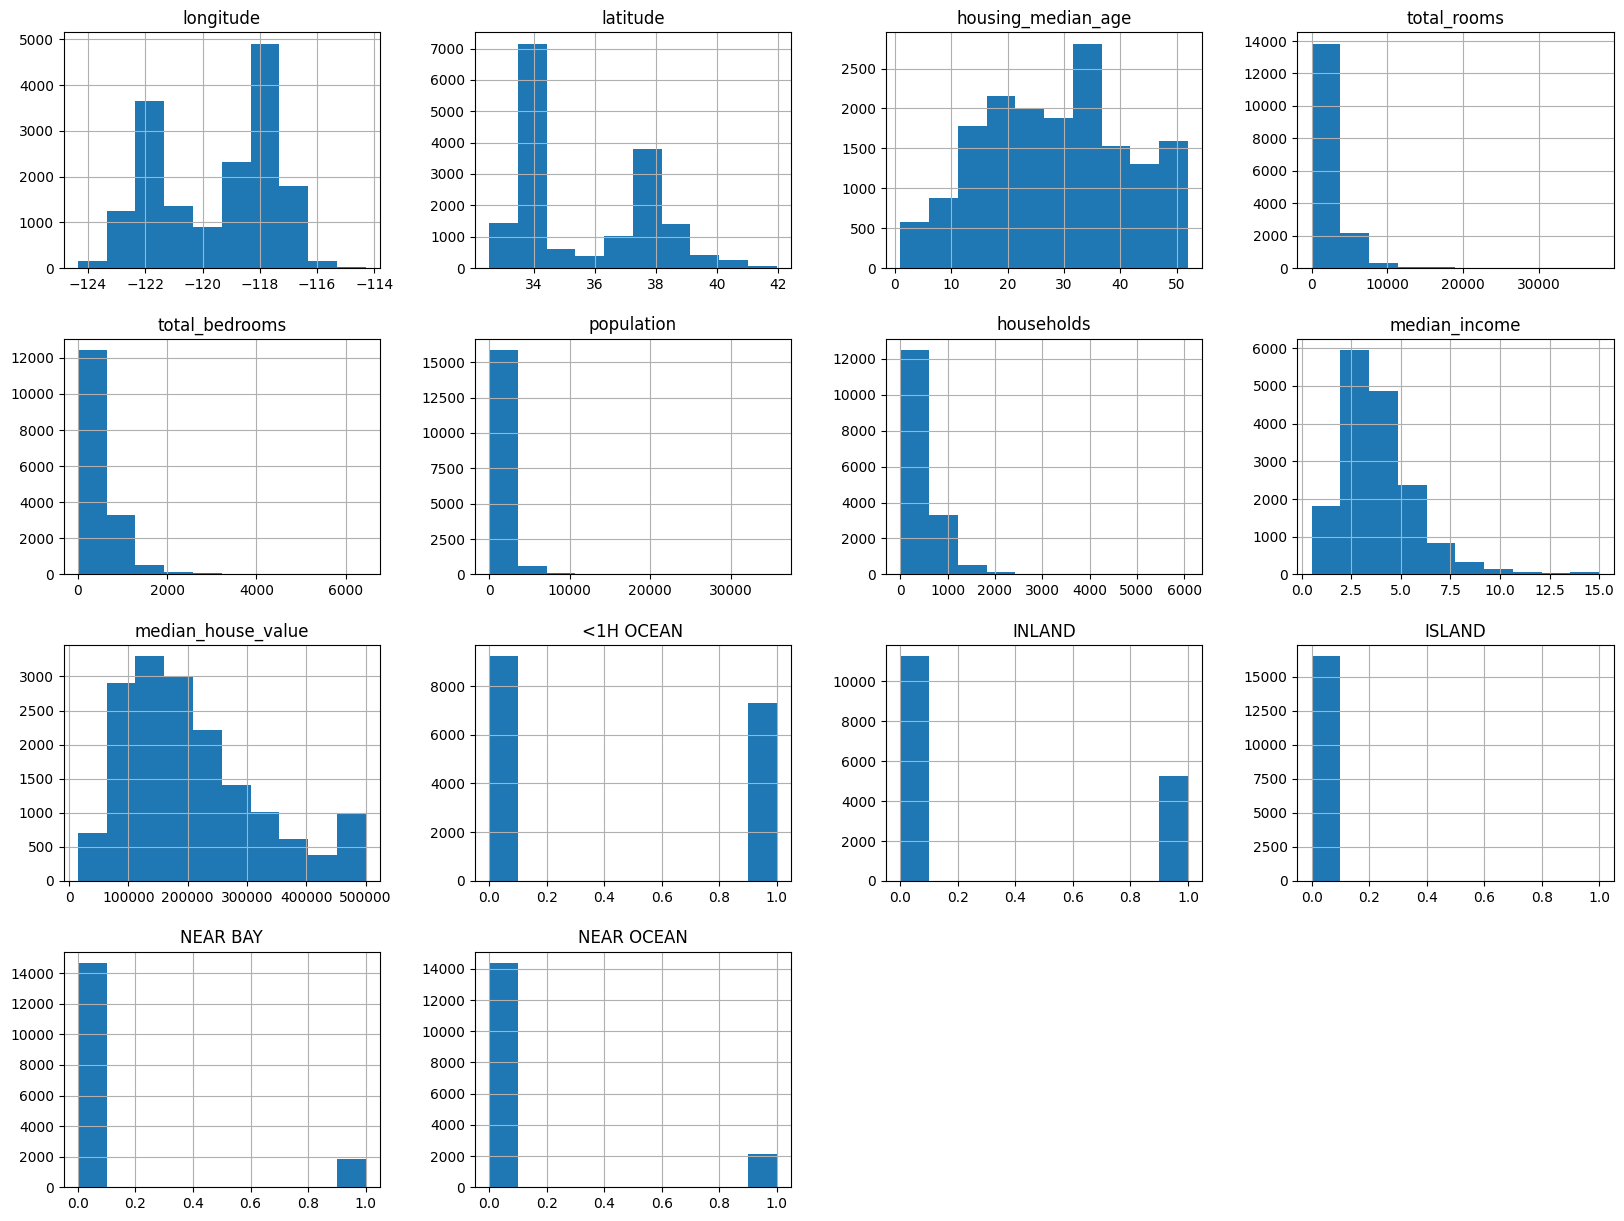

In [15]:
#One Hot Encoding train_data for ocean_proximity

train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype='int32')).drop(['ocean_proximity'],axis=1)
train_data.hist(figsize=(20,15))



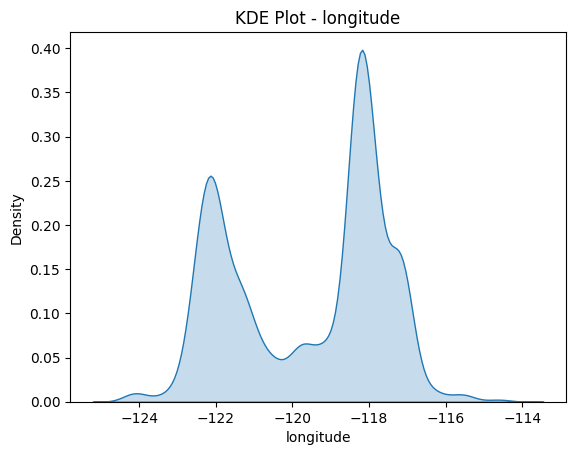

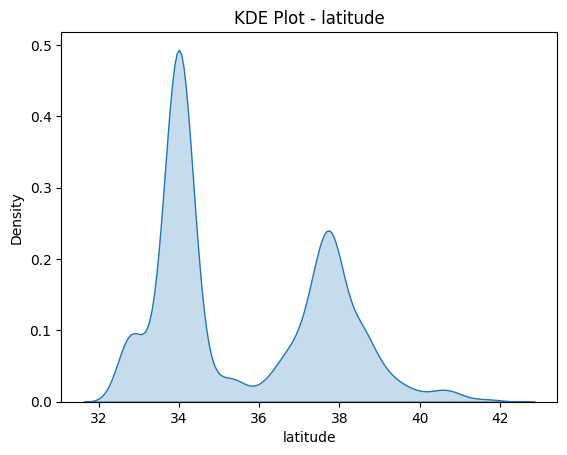

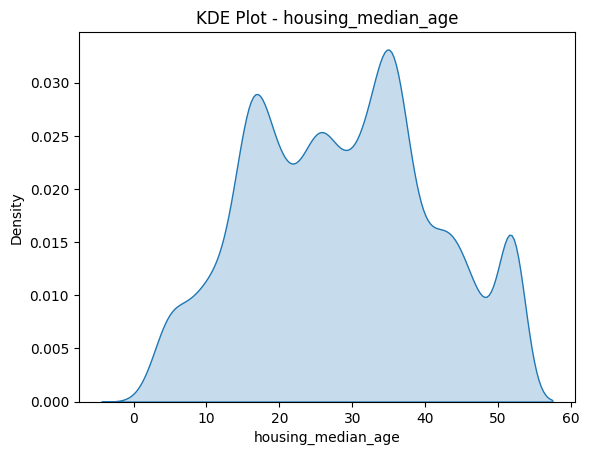

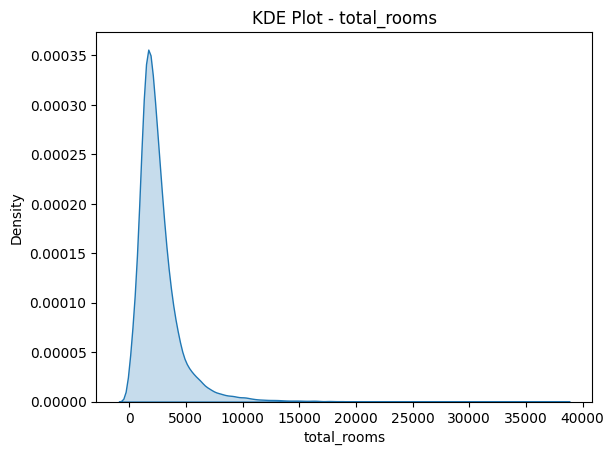

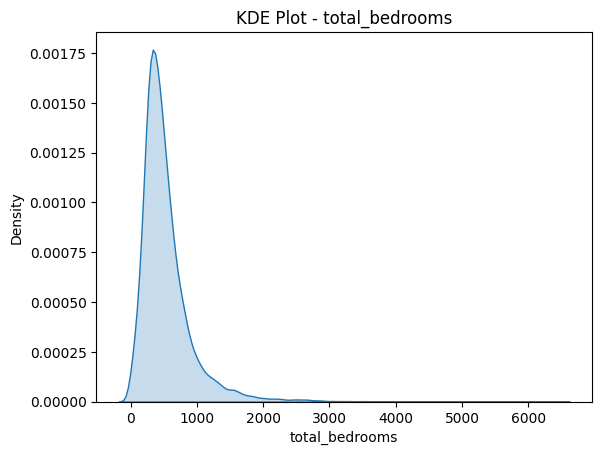

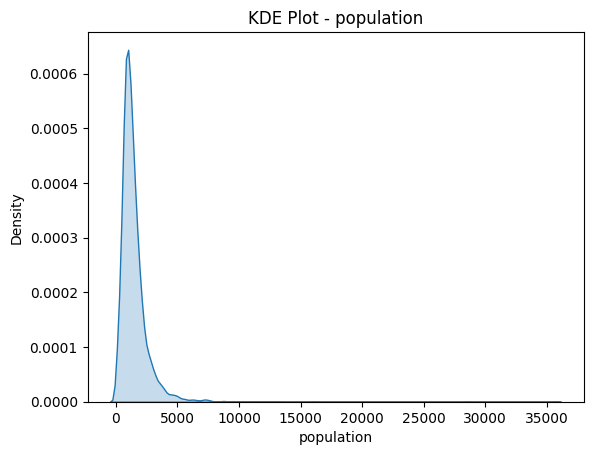

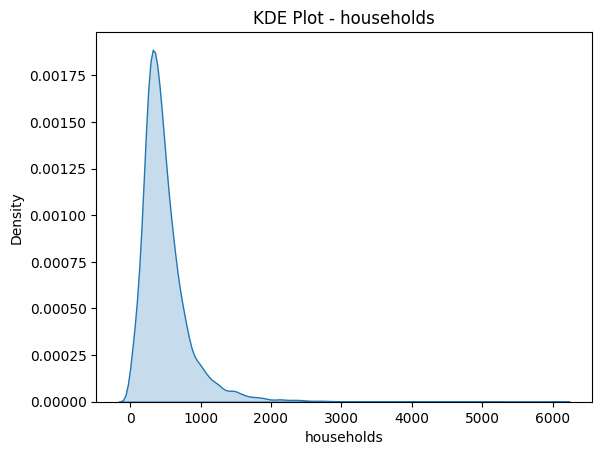

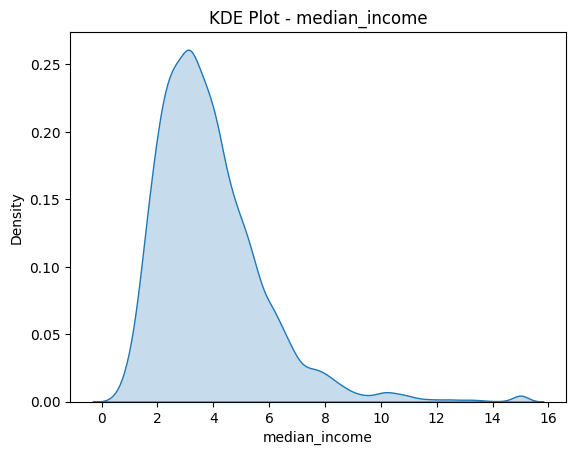

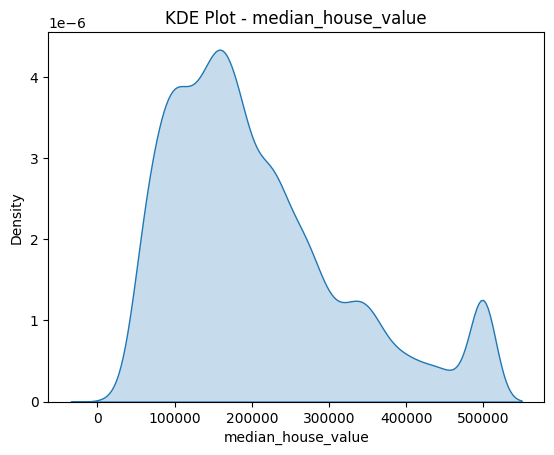

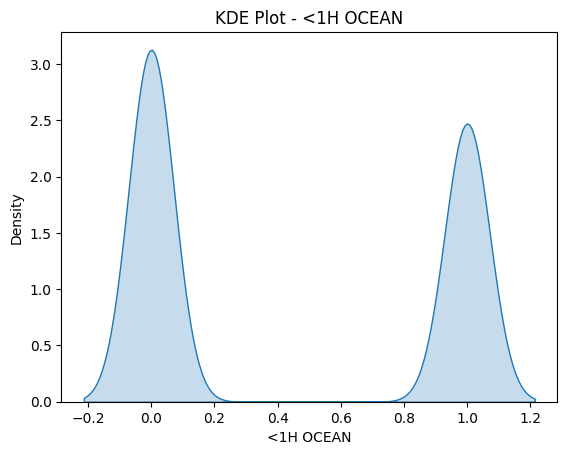

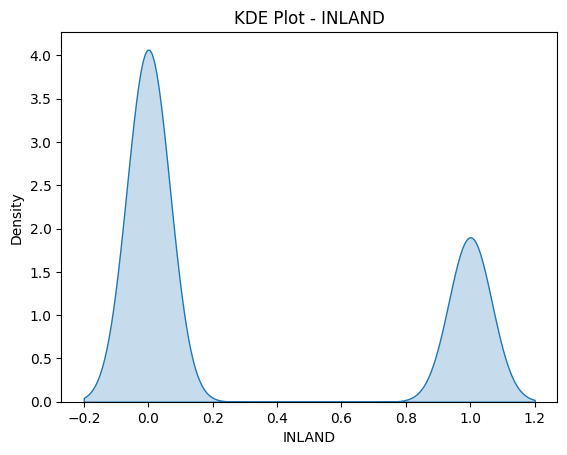

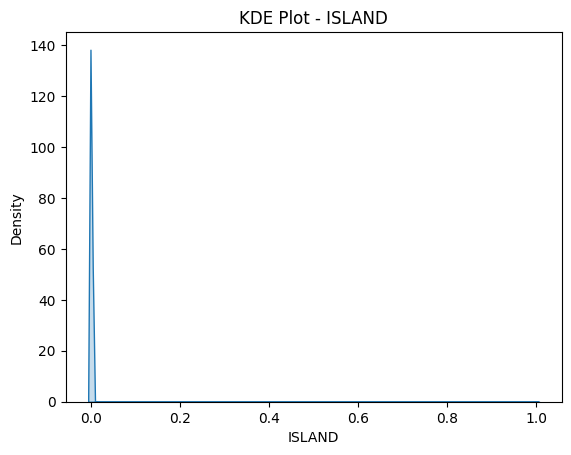

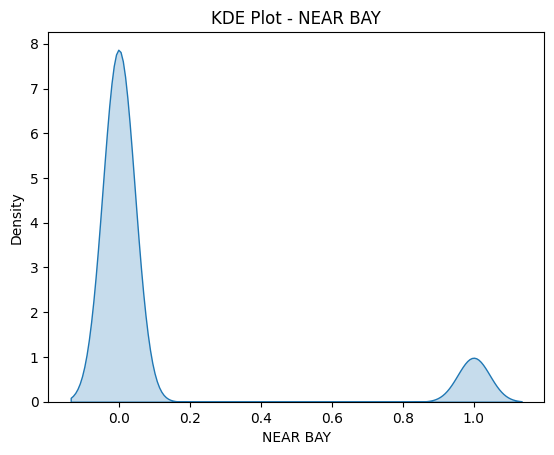

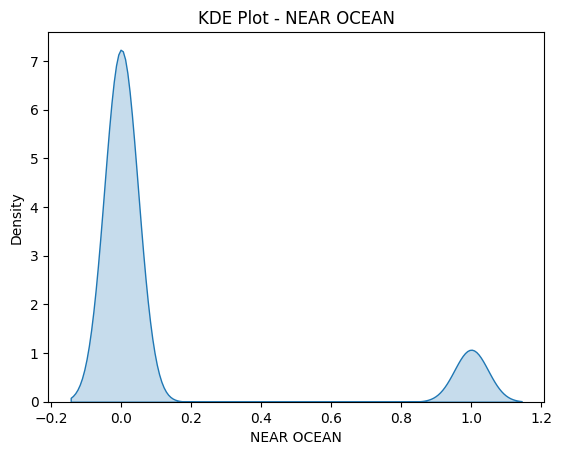

In [16]:
for column in train_data.columns:
    # Create a KDE plot for the column
    sns.kdeplot(train_data[column], fill=True)
    # Set plot title
    plt.title(f'KDE Plot - {column}')
    # Show the plot
    plt.show()

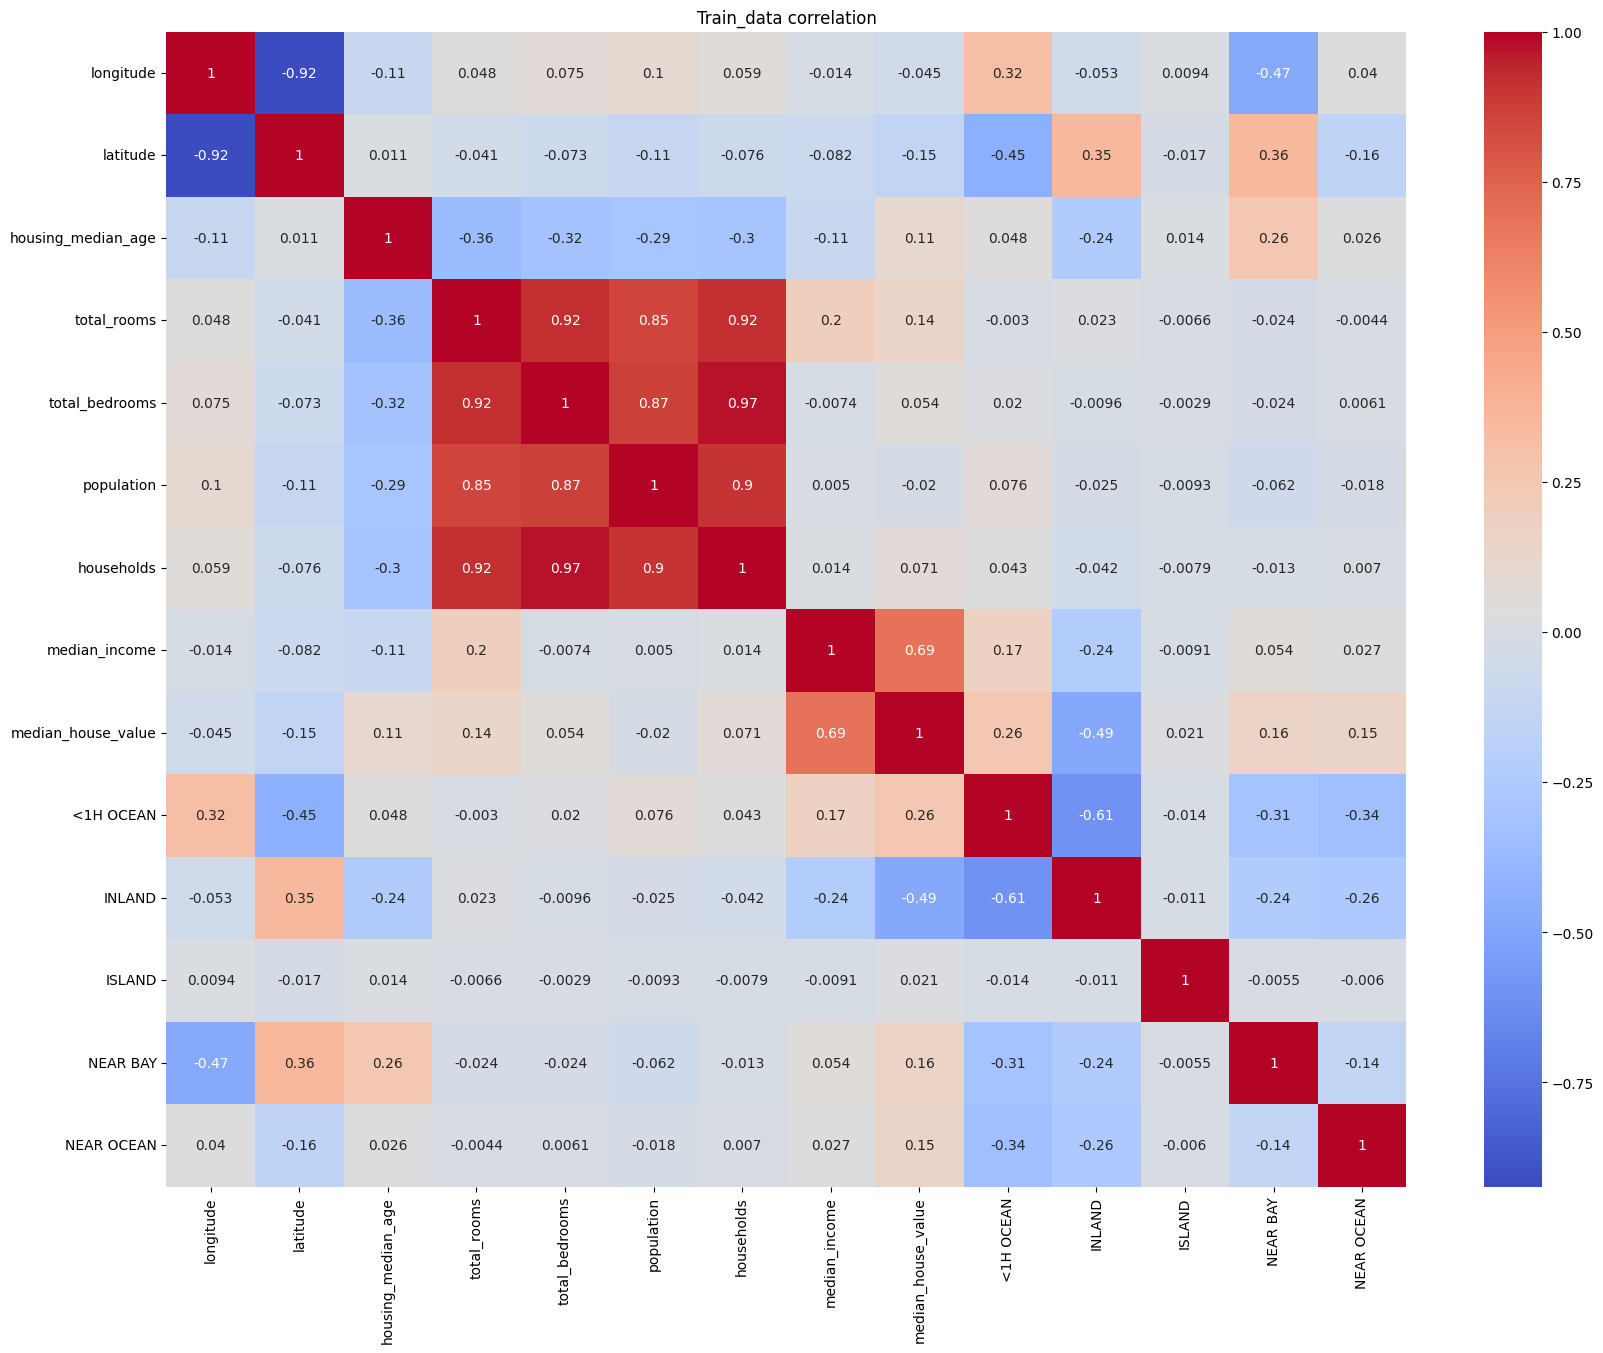

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')
plt.title('Train_data correlation')
plt.show()

In [18]:
#Preprocessing data
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

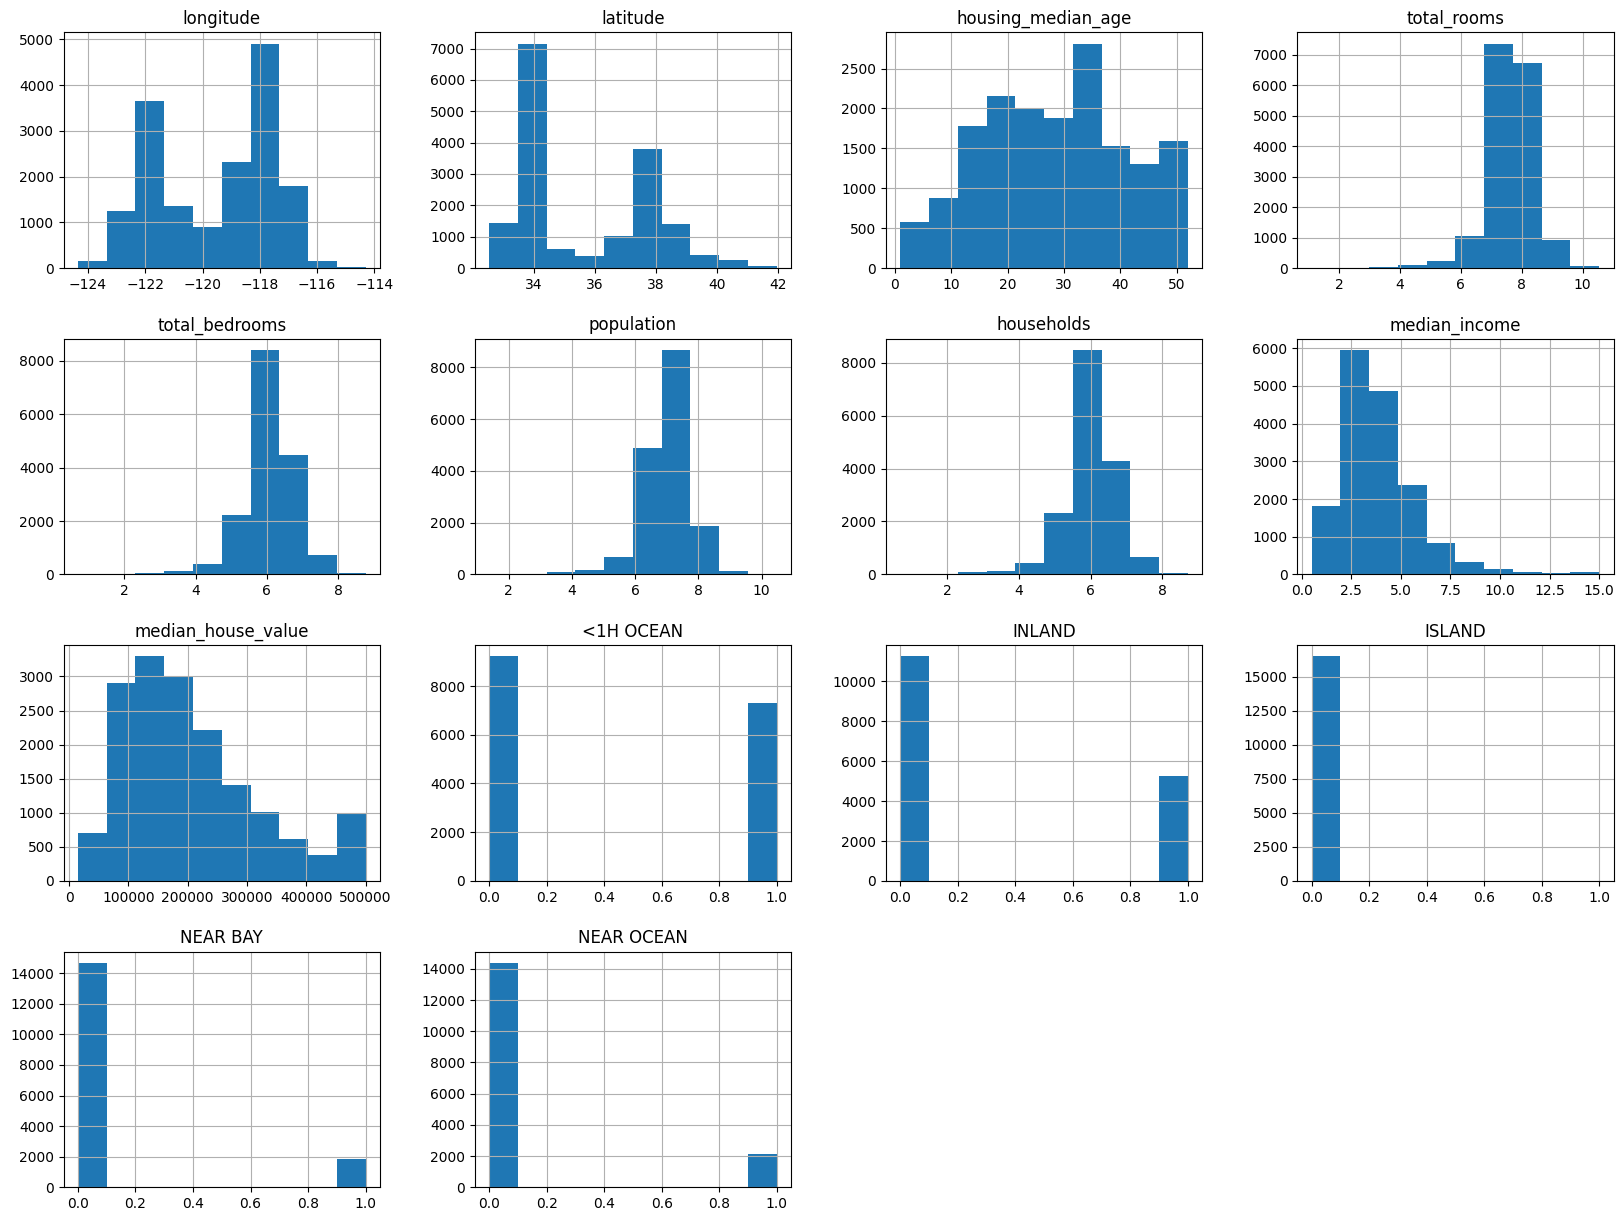

In [19]:
train_data.hist(figsize=(20,15))

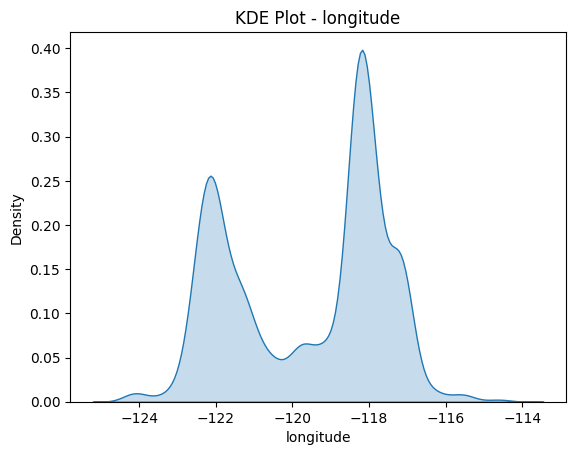

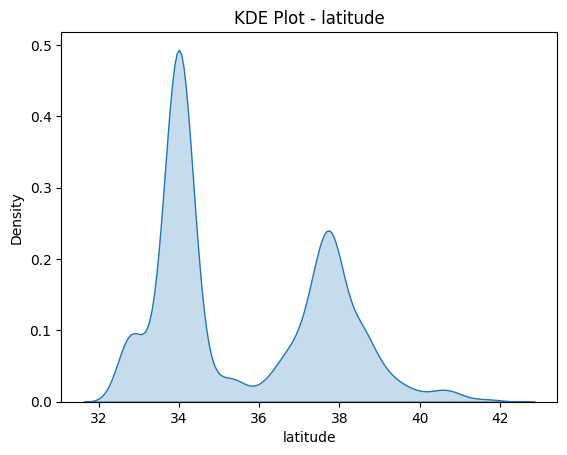

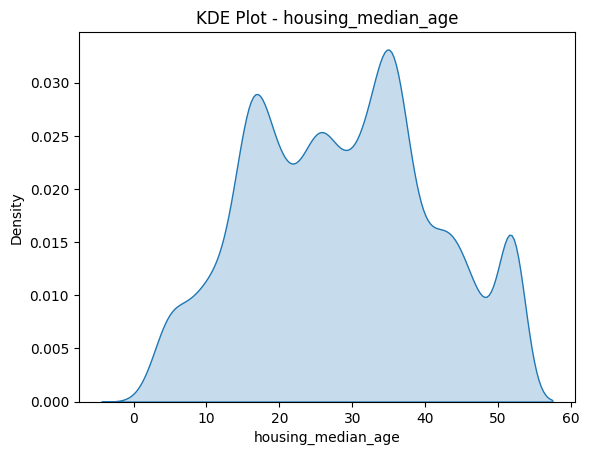

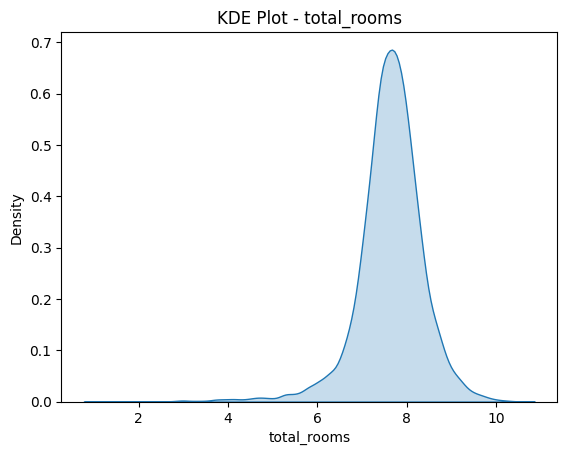

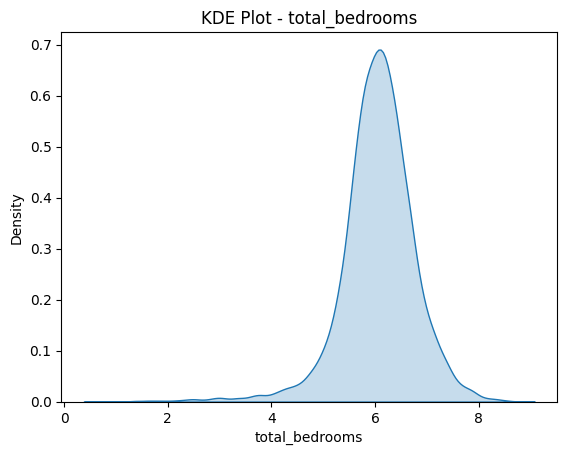

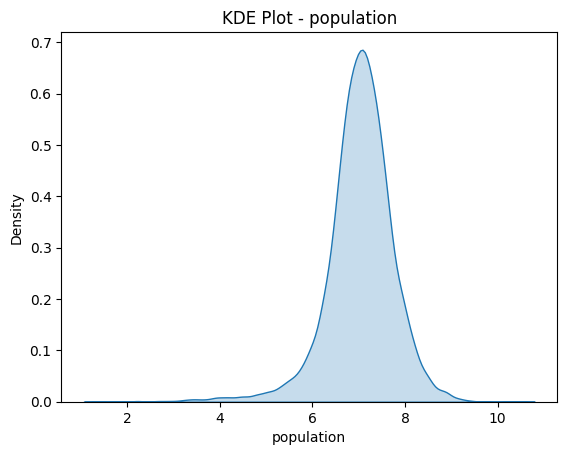

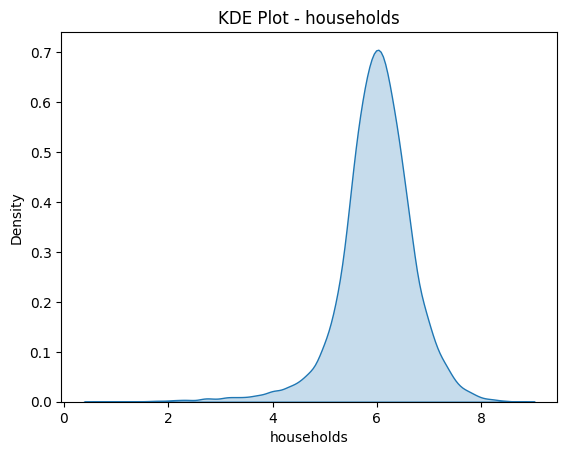

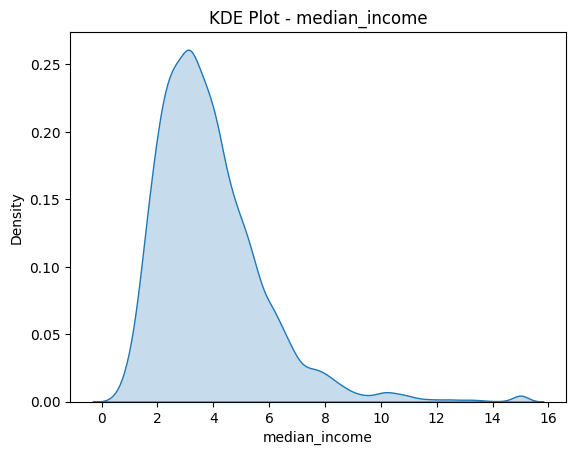

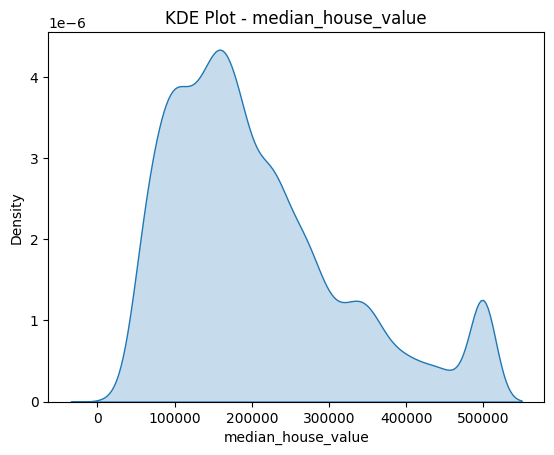

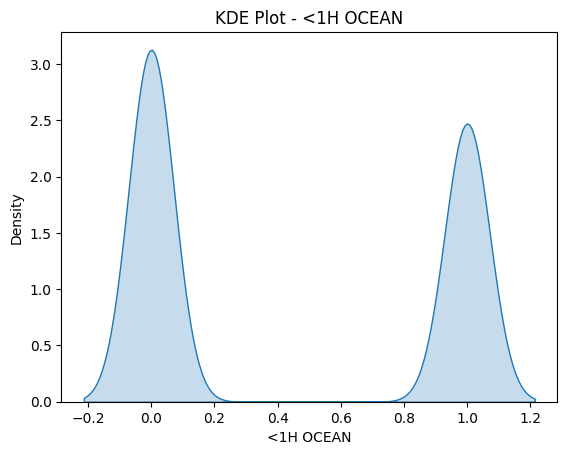

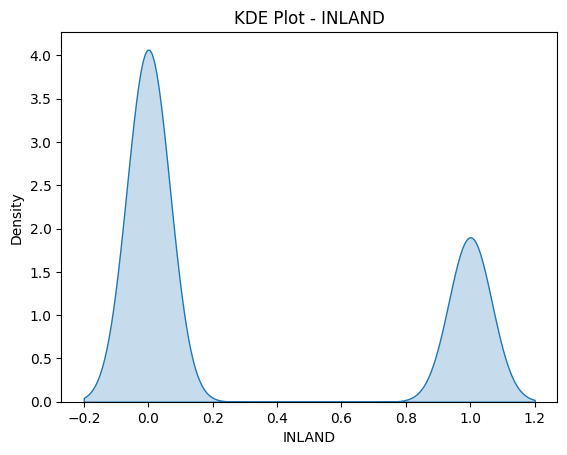

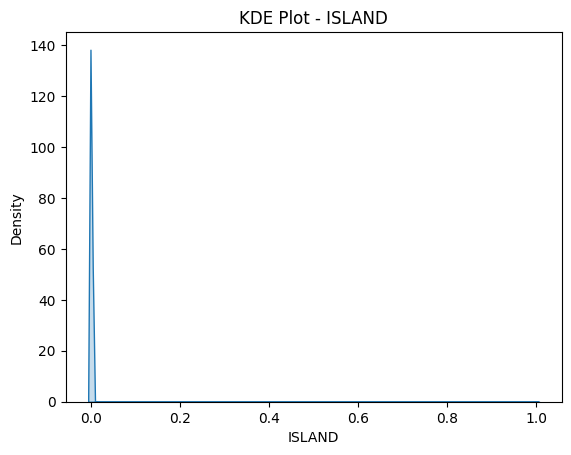

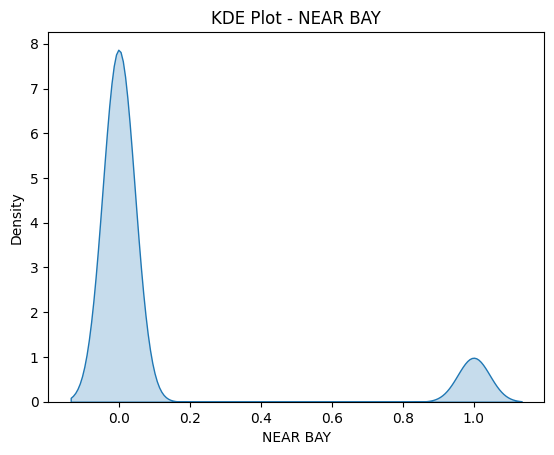

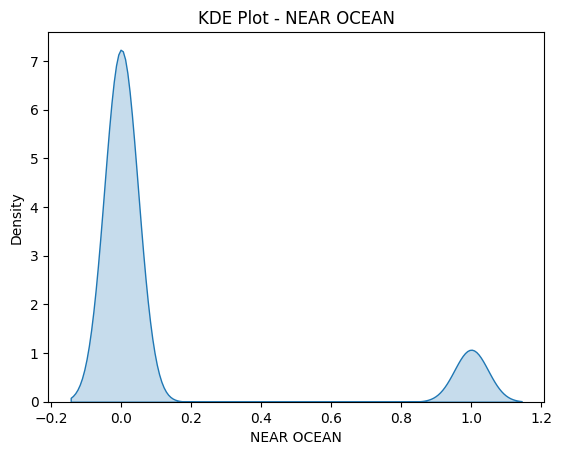

In [20]:
for column in train_data.columns:
    # Create a KDE plot for the column
    sns.kdeplot(train_data[column], fill=True)
    # Set plot title
    plt.title(f'KDE Plot - {column}')
    # Show the plot
    plt.show()

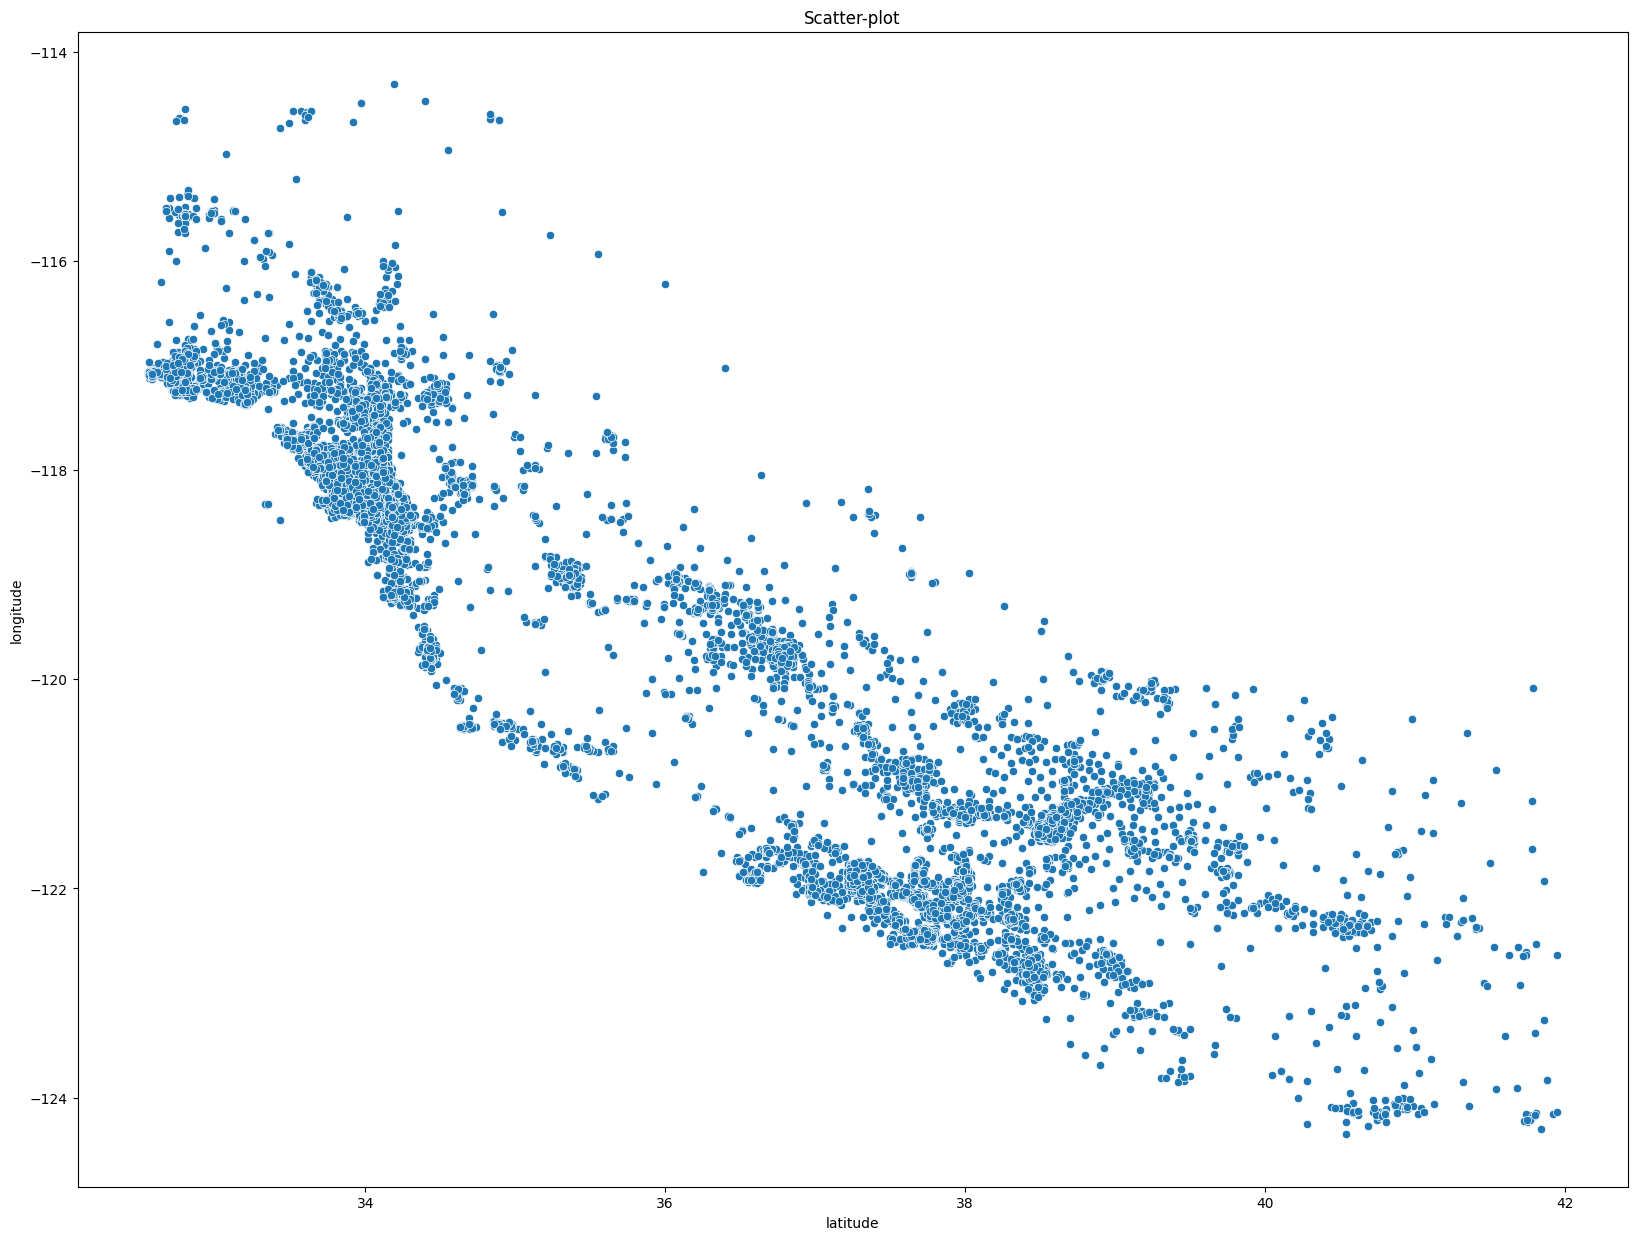

In [21]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='latitude',y='longitude',data=train_data)
plt.title('Scatter-plot')
plt.show()

In [22]:
#feature Engineering
train_data['bedroom_ration']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

In [23]:

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms
16477,-121.26,38.13,25.0,7.843849,6.516193,7.627544,6.475433,2.0875,83100.0,0,1,0,0,0,0.830739,1.211324
15589,-116.67,32.97,16.0,5.857933,4.317488,4.795791,3.784190,5.3590,193800.0,1,0,0,0,0,0.737033,1.548002
8816,-118.32,33.75,37.0,6.985642,4.912655,5.905362,4.962845,11.6677,500001.0,0,0,0,0,1,0.703250,1.407588
18405,-121.86,37.25,16.0,8.847791,7.170888,7.994970,7.104965,4.2885,262400.0,1,0,0,0,0,0.810472,1.245297
11182,-117.94,33.82,34.0,7.206377,5.361292,6.517671,5.308268,3.8828,215400.0,1,0,0,0,0,0.743965,1.357576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,-117.21,34.04,14.0,8.027477,6.056784,7.359468,6.040255,6.2917,224700.0,0,1,0,0,0,0.754507,1.328996
17562,-121.89,37.32,41.0,6.885510,5.583496,6.763885,5.537334,3.2317,184800.0,1,0,0,0,0,0.810905,1.243470
16316,-121.32,38.00,21.0,7.493317,6.180017,7.016610,6.159095,2.0091,101500.0,0,1,0,0,0,0.824737,1.216626
9985,-122.57,38.58,18.0,7.642044,6.228511,6.831954,6.190315,1.9925,225000.0,0,1,0,0,0,0.815032,1.234516


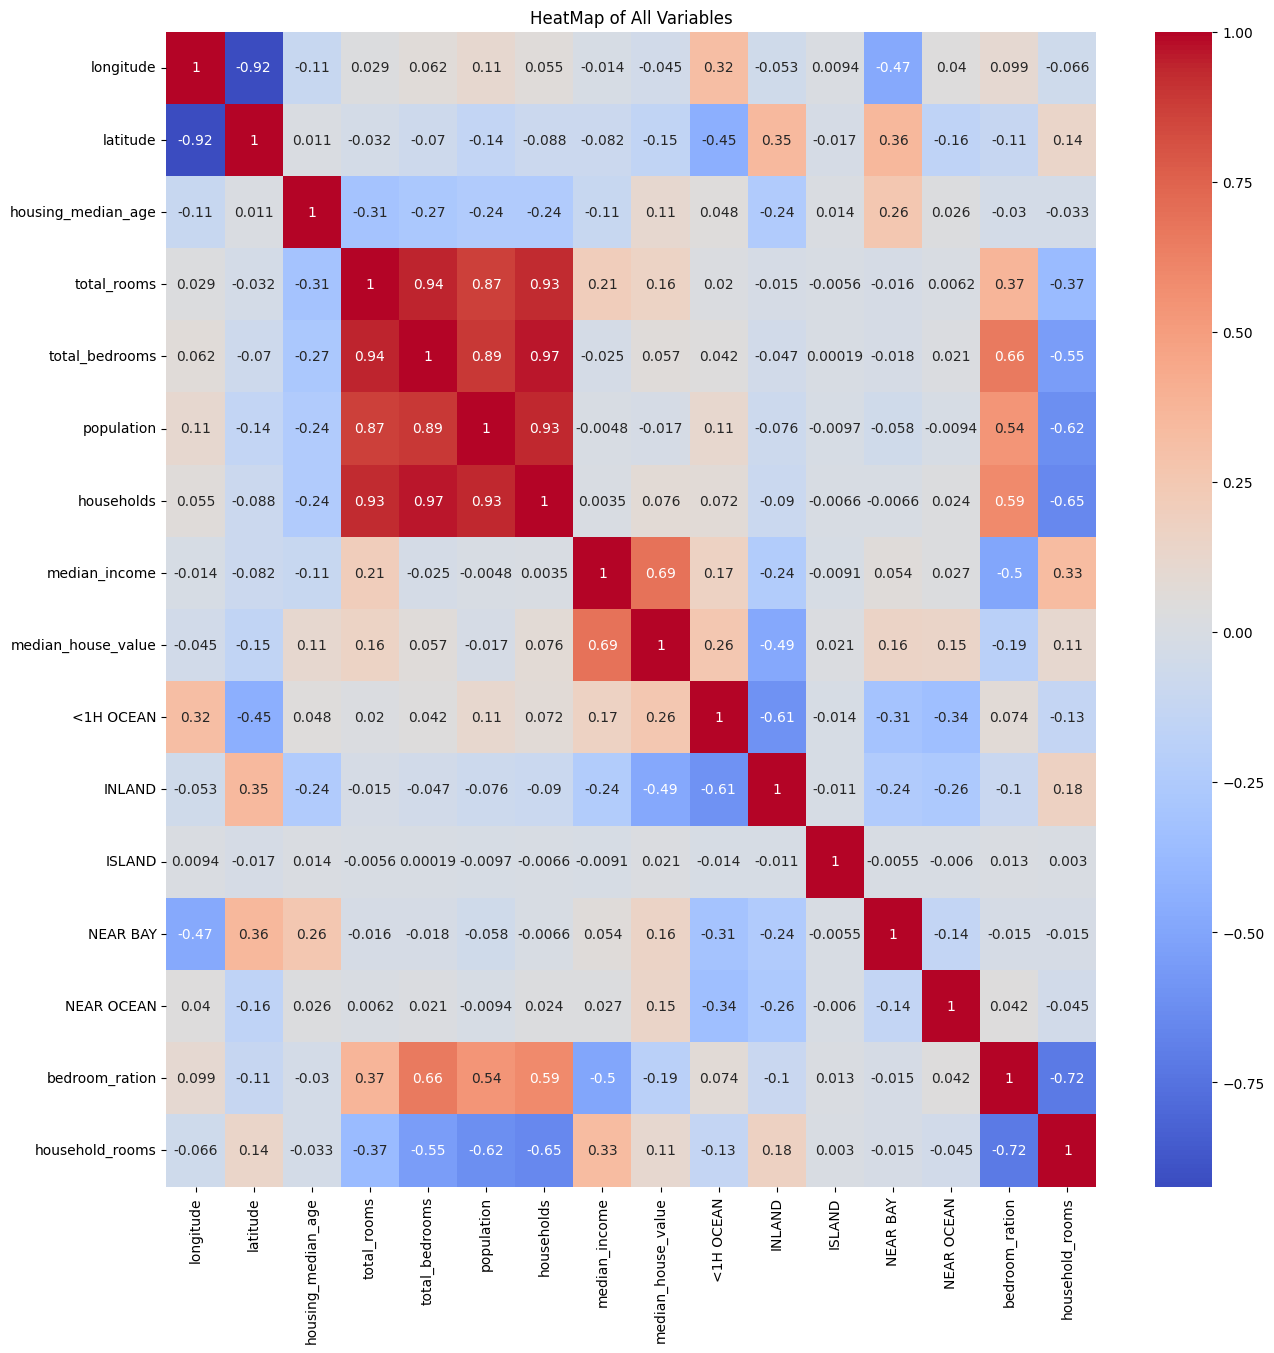

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')
plt.title('HeatMap of All Variables')
plt.show()

In [25]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype='int32')).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ration']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [26]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalear=StandardScaler()

reg=LinearRegression()


In [27]:
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

x_train=scalear.fit_transform(x_train)


In [28]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
x_test=scalear.transform(x_test)
reg.fit(x_train,y_train)



LinearRegression()

In [29]:
reg.score(x_test,y_test)

0.665571843703888

In [30]:
reg.score(x_train,y_train)

0.6687277262295388

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train,y_train)

0.8090187172127657

In [34]:
forest.score(x_test,y_test)

0.8090187172127657

In [36]:
#Using Cross_validation

from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest=grid_search.best_estimator_
best_forest


RandomForestRegressor(max_features=8, n_estimators=30)

In [41]:
best_forest.score(x_test,y_test)

0.807802231581604